# IMST E-111 Coding Challenge Fall 2021
#### Make sure to include any relevant code when providing all answers. 
Save this as a `.ipynb` file with all results visible and send it to Vasya when you're done.<br>
Enter your code into *this* notebook **AND** Enter your name in the following cell (`5 pts`)

#### Always show your work, and if there is a question being asked be sure to answer it.
You can answer with a comment, print statement or markdown cell <br>(remember a comment is preceded by a hash symbol `#here is my comment`)


### Challenge is out of 150 points 
  * **100 points for the main challenge**
  * **50 bonus points for extra credit**
 
#### Notes
* Dont worry about missing values, they're addressed in the Extra Credit portion

#### Submission
* send this completed .ipynb (with all cells run) to vasyatheta@gmail.com with your first and last name in the filename (e.g., `Vasya_Selsov_CodingChallenge_S2022.ipynb`)
* If you cant find the location of this notebook you can run the following to find your notebook:<br> 
`import os`<br>
`print(os.getcwd())`<br>
Drag and drop that .ipynb file into your email

In [2]:
#name: Manoj Sharma

In [3]:
%matplotlib inline
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd

### 1. Load your Data and Take a Look

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** **(`10 pts`)** Load the training data (found in the same github repo as this notebook) into this notebook using Pandas. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b.** **(`5 pts`)** Show the first 10 lines of the data.

In [4]:
#Loading the data from codingdata.csv file, which is in the same directory as this file
#The data is in the form of a csv file, and separater is ','
df = pd.read_csv('codingdata.csv', sep=",")


In [5]:
#checking the no. of rows and no. of columns in the dataframe, to check if the data is loaded correctly
df.shape

(68353, 12)

In [6]:
#checking the data types of each column in the dataframe, and showing first 10 rows
df.head(10)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0
5,EMA00081000131660,1,1.5,1,G,2,NaN,2,416,11.0,0.0,0
6,EMA00081000160500,1,3.2,1,E,2,34.0,3,116,4.0,0.0,0
7,EMA00081000269630,1,0.7,2,G,2,21.0,2,1241,6.0,2.0,0
8,EMA00081000287790,1,2.0,1,G,2,NaN,3,655,11.0,4.0,0
9,EMA00081000367310,2,0.5,1,G,2,40.0,3,655,11.0,0.0,0


In [7]:
#As we can see the data was loaded correctly, and we are able to see the columns and rows of the dataframe
#Now we will check the data types of each column in the dataframe
df.dtypes

Email_ID                      object
Email_Type                     int64
Subject_Hotness_Score        float64
Email_Source_Type              int64
Customer_Location             object
Email_Campaign_Type            int64
Total_Past_Communications    float64
Time_Email_sent_Category       int64
Word_Count                     int64
Total_Links                  float64
Total_Images                 float64
Email_Status                   int64
dtype: object

### 2.  Define and describe your target variable
The `email status` column contains three values with the following definitions.  
`0=ignored` `1=read` and `2=converted`
* Ignored means that the customer did not interact with the email
* Read means that a customer opened the email
* Converted means that the customer clicked on the link for the product page within the email. 

The company considers an `email_status` of `2` as a conversion, (statuses 0 and 1 are non-conversions).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** **(`10 pts`)** Create a new column called `conversion` that has a value of `1` when the email was follwed by a conversion and is `0` otherwise.

In [8]:
df['conversion'] = df['Email_Status'].apply(lambda x: 1 if x == 2 else 0)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b.**  **(`10 pts`)** How many conversions are in this dataset?<br>

In [9]:
#how many rows have conversion = 1
df[df['conversion'] == 1].shape

#total no. of conversions in the dataset are 2373


(2373, 13)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**c.**  **(`10 pts`)** What percent of all emails resulted in a conversion?<br><i>Show output you used to determine this answer and provide your answer as a comment</i>

In [10]:
#what is the conversion rate of the dataframe by percentage
df[df['conversion'] == 1].shape[0]/df.shape[0]*100

#The output of the above command is 3.47168%, which means that the conversion rate is 3.47%

3.4716837593082963

### 3 Exploration

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** The `Email_Campaign_Type` column captures the campaign under which the email was sent. A campaign is a marketing strategy.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i.**  **(`15 pts`)** Which campaign had the most conversions?

In [11]:
#show no. of conversions by Email_Campaign_Type
df.groupby('Email_Campaign_Type').conversion.sum()


Email_Campaign_Type
1     173
2     712
3    1488
Name: conversion, dtype: int64

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii.**  **(`15 pts`)** Which campaign has the highest conversion rate?

In [12]:
#which campaigns have the highest conversion percentage based on no. of conversions
conversion_rate_by_campaign = df.groupby(
    by='Email_Campaign_Type'
)['conversion'].sum() / df.groupby(
    by='Email_Campaign_Type'
)['conversion'].count() * 100.0



In [13]:

#which campaigns have the highest conversion percentage based on no. of conversions
conversion_rate_by_campaign.sort_values(ascending=False).map('{:,.2f}%'.format)

#Email_Campaign_Type_1 has the highest conversion rate of 23.5%


Email_Campaign_Type
1    23.51%
3     7.69%
2     1.47%
Name: conversion, dtype: object

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b**.
`Total_Past_Communications` is a count of the number of times the customer has been contacted prior to the current email. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i.** **(`11 pts`)** Create a box plot showing the distribution of `Total_Past_Communications` by `conversion`. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii** **(`6 pts`)** How do conversions relate to the number of times a customer had been emailed?  Set the title to something that briefly summarizes this relationship. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii.** **(`2 pts`)** Set the x-label to be `Conversion Status` and the y-label to be `Previous Emails`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv** **(`1 pts`)** Prevent the default text `'Boxplot grouped by conversion'` from displaying in the title of the boxplot, and do not show extreme values / outliers.  Then show your plot!

_note: the output should be one boxplot, rather than one boxplot per sub-question_

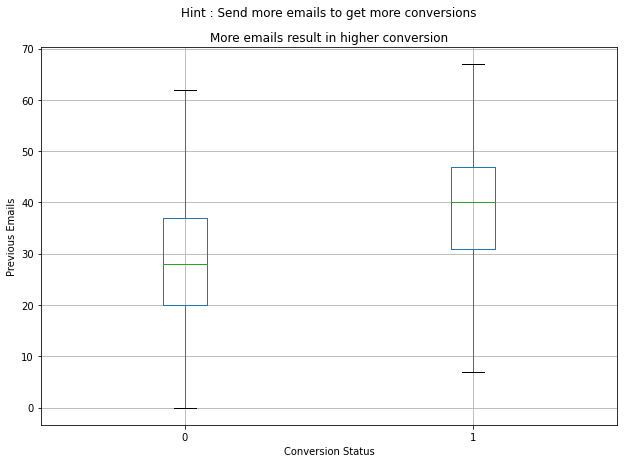

In [14]:
ax = df[['conversion', 'Total_Past_Communications']].boxplot(
    by='conversion',
    showfliers=False,
    figsize=(10, 7)
)

ax.set_xlabel('Conversion Status')
ax.set_ylabel('Previous Emails')
ax.set_title('More emails result in higher conversion')

plt.suptitle("Hint : Send more emails to get more conversions")
plt.show()

***
You're done!  You can relax and submit this assignment! <br>If you're feeling ambitious, you can try your hand at the _extra credit_ portion below.  

***
# Extra Credit: Build, Interpret and Assess a Machine Learning Model to Predict Conversion Rate

**1.  Data Cleaning & Prep** 
We'll be encoding a categorical variable, joining it to all of our numerical variables and generating a train-test split to train and test our model.<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** **(`5 pts`)** Which columns are categorical columns and which are numerical? Create a list of categorical column names and a list of numerical column names. Ignore the following columns: `Email_ID`, `Email_Status`, `conversion`.  You should have ten columns to categorize.  Save each list to a variable (e.g., `my_var = ['a', 'b', 'c']`)

In [15]:
df.describe()


,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status,conversion
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934,0.034717
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032,0.183063
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000,1.000000


In [16]:
#find nan values in the dataframe
df.isnull().sum()


Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
conversion                       0
dtype: int64

In [17]:
#nedd to impute the missing values in the dataframe
#impute missing Customer_location with "unknown"
df.Customer_Location.fillna("unknown", inplace=True)

#impute total_past_communications with 0
df.Total_Past_Communications.fillna(0, inplace=True)

#impute Total_Images with 0
df.Total_Images.fillna(0, inplace=True)

#impute Total_Links with 0
df.Total_Links.fillna(0, inplace=True)

In [18]:
#listing categorical variables
categorical_vars = [
    'Email_Type',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Time_Email_sent_Category'
]

In [19]:
df[categorical_vars].nunique()

Email_Type                  2
Email_Source_Type           2
Customer_Location           8
Email_Campaign_Type         3
Time_Email_sent_Category    3
dtype: int64

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**c.** **(`10 pts`)** Add Dummy Variables!   (Hint: Follow the code in chapter 4)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i.** Using `pd.get_dummies(<your_column_of_data>, drop_first=True)`, create a new dataframe that contains the dummy-variable version of `Email_Campaign_Type`. <br>**Note/Warning:** <i>This is a bit different than we did in class since we use the `drop_first` argument.  `drop_first` means:  Don't encode Campaign 1, just tell me how good Campaigns 2 & 3 are in relation to Campaign 1.  This is necessary for the model to produce sensible results</i><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii.** Rename the columns of this dataframe to be `'Campaign_2','Campaign_3'`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii.** Concatenate this dataframe to the original dataframe.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv.** Create a variable called `all_features` that is a list of all the variables we want to use in our model.  This will be all numerical variables and the dummy variables `'Campaign_2','Campaign_3'`.  Print the variable (i.e., `print(all_features)`).  <br>


In [20]:
#Encoding Email type
df['Email_Type'].unique()

array([1, 2], dtype=int64)

In [21]:
Email_Type_encoded_df = pd.get_dummies(df['Email_Type'])
Email_Type_encoded_df.columns = ['Email_Type%s' % x for x in Email_Type_encoded_df.columns]



In [22]:
Email_Type_encoded_df.head()

,Email_Type1,Email_Type2
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [ ]:
#joining the encoded Email_Type with the original dataframe
df = pd.concat([df, Email_Type_encoded_df], axis=1)
df.head()

In [23]:
#Encoding Email source type, Customer location, Email campaign type, Time email sent category


Email_Source_Type_encoded_df = pd.get_dummies(df['Email_Source_Type'])
Email_Source_Type_encoded_df.columns = ['Email_Source_Type%s' % x for x in Email_Source_Type_encoded_df.columns]

Customer_Location_encoded_df = pd.get_dummies(df['Customer_Location'])
Customer_Location_encoded_df.columns = ['Customer_Location%s' % x for x in Customer_Location_encoded_df.columns]

Email_Campaign_Type_encoded_df = pd.get_dummies(df['Email_Campaign_Type'])
Email_Campaign_Type_encoded_df.columns = ['Email_Campaign_Type%s' % x for x in Email_Campaign_Type_encoded_df.columns]

#Time_Email_sent_Category 
Time_Email_sent_Category_encoded_df = pd.get_dummies(df['Time_Email_sent_Category'])
Time_Email_sent_Category_encoded_df.columns = ['Time_Email_sent_Category%s' % x for x in Time_Email_sent_Category_encoded_df.columns]



In [24]:
Email_Source_Type_encoded_df.head()

,Email_Source_Type1,Email_Source_Type2
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1


In [25]:
#adding the encoded categorical variables to the original dataframe
df = pd.concat([df, Email_Source_Type_encoded_df], axis=1)
df = pd.concat([df, Customer_Location_encoded_df], axis=1)
df = pd.concat([df, Email_Campaign_Type_encoded_df], axis=1)
df = pd.concat([df, Time_Email_sent_Category_encoded_df], axis=1)


In [ ]:
#listing the columns in the dataframe
list(df.columns)

In [26]:
#create a variable called all_features, which contains all the features, minus email ID and conversion, minus the categorical variables
# because the categorical variables are encoded, we will not include them in the all_features variable
all_features = list(df.columns)
all_features.remove('conversion')
all_features.remove('Email_ID')
all_features.remove('Email_Type')
all_features.remove('Email_Source_Type')
all_features.remove('Customer_Location')
all_features.remove('Email_Campaign_Type')
all_features.remove('Time_Email_sent_Category')
all_features.remove('Email_Status')


In [27]:
#list of columns after encoding
#Create a variable called `all_features` that is a list of all the variables we want to use in our model.  
# This will be all numerical variables and the dummy variables `'Campaign_2','Campaign_3'`.  
# Print the variable (i.e., `print(all_features)`)
print(all_features)

['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Total_Links', 'Total_Images', 'Email_Source_Type1', 'Email_Source_Type2', 'Customer_LocationA', 'Customer_LocationB', 'Customer_LocationC', 'Customer_LocationD', 'Customer_LocationE', 'Customer_LocationF', 'Customer_LocationG', 'Customer_Locationunknown', 'Email_Campaign_Type1', 'Email_Campaign_Type2', 'Email_Campaign_Type3', 'Time_Email_sent_Category1', 'Time_Email_sent_Category2', 'Time_Email_sent_Category3']


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**d.** **(`7.5 pts`)** Split the dataframe into 80% training data and 20% testing data using the `train_test_split` function (see section 3 of the notebook from Chapter 8 for an example of how to do this.) When you pass the data to be split, be sure to add an intercept!  
To do this simply pass `sm.add_constant(df[all_features])` (where `sm` is the alias for `statsmodels.api`) instead of just `df[all_features]` (in other words, `df[all_features]` is your modeling dataframe subset to the features you will use to model).  
Finally, add the following argument to train_test_split:  `random_state=42`

*print the number of rows and columns in all the dataframes you created in this step*

In [28]:
#split the dataframe into 80% training and 20% testing data using train_test_split function, be sure to add an intercept column to the training data
#add random_statee=42 to ensure that the results are consistent
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X = sm.add_constant(df[all_features])
y = df['conversion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



C:\Users\manoj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
#print the no. of rows and columns in the training and testing dataframes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(54682, 22)
(13671, 22)
(54682,)
(13671,)


**2.  Build, interpret and score a logistic regression model!** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** **(`5 pts`)** Build a Logistic Regression using statsmodels (statsmodels.api) as in Chapter 3.  Only include the *train* data you created in question 1d.<br>

In [30]:
logit = sm.Logit(
    y_train, 
    X_train
)

logit_fit = logit.fit()
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.132568
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             conversion   No. Observations:                54682
Model:                          Logit   Df Residuals:                    54664
Method:                           MLE   Df Model:                           17
Date:                Fri, 22 Apr 2022   Pseudo R-squ.:                  0.1269
Time:                        21:47:55   Log-Likelihood:                -7249.1
converged:                       True   LL-Null:                       -8303.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.1839   1.44e+06  -8.24e-07      1.000   -2.82e+06    2.82e+06
Subject_Hotness_Score        -0.1590      0.051     -3.114      0.002      -0.259      -0.059
Total_Past_Communications     0.0251      0.002     12.304      0.000       0.021       0.029
Word_Count                   -0.0008      0.000     -7.888      0.000      -0.001      -0.001
Total_Links                   0.0234      0.005      4.286      0.000       0.013       0.034
Total_Images                 -0.0021      0.006     -0.338      0.735      -0.014       0.010
Email_Source_Type1           -0.4522   6.42e+05  -7.04e-07      1.000   -1.26e+06    1.26e+06
Email_Source_Type2           -0.7317   6.58e+05  -1.11e-06      1.000   -1.29e+06    1.29e+06
Customer_LocationA           -0.0958   1.23e+06  -7.77e-08      1.000   -2.42e+06    2.42e+06
Customer_LocationB           -0.2965   1.23e+06   -2.4e-07      1.000   -2.42e+06    2.42e+06
Customer_LocationC           -0.0841   1.24e+06   -6.8e-08      1.000   -2.42e+06    2.42e+06
Customer_LocationD           -0.1388   1.23e+06  -1.13e-07      1.000   -2.41e+06    2.41e+06
Customer_LocationE           -0.1890   1.23e+06  -1.53e-07      1.000   -2.42e+06    2.42e+06
Customer_LocationF           -0.1069   1.23e+06  -8.67e-08      1.000   -2.41e+06    2.41e+06
Customer_LocationG           -0.0959   1.23e+06  -7.82e-08      1.000    -2.4e+06     2.4e+06
Customer_Locationunknown     -0.1770   1.23e+06  -1.44e-07      1.000   -2.42e+06    2.42e+06
Email_Campaign_Type1          1.6262   9.49e+05   1.71e-06      1.000   -1.86e+06    1.86e+06
Email_Campaign_Type2         -2.1064   9.49e+05  -2.22e-06      1.000   -1.86e+06    1.86e+06
Email_Campaign_Type3         -0.7038   9.49e+05  -7.41e-07      1.000   -1.86e+06    1.86e+06
Time_Email_sent_Category1    -0.3856   2.17e+06  -1.78e-07      1.000   -4.25e+06    4.25e+06
Time_Email_sent_Category2    -0.4090   2.17e+06  -1.89e-07      1.000   -4.25e+06    4.25e+06
Time_Email_sent_Category3    -0.3894   2.17e+06   -1.8e-07      1.000   -4.25e+06    4.25e+06
=============================================================================================
"""

In [31]:


import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


In [32]:
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\manoj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\manoj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\manoj\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\manoj\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\manoj\anaconda3\lib

In [33]:
best_clf.best_estimator_.get_params()['classifier']

LogisticRegression(C=0.0001, penalty='l1', solver='liblinear')

In [34]:
print('Model accuracy is',best_clf.score(X_test, y_test))

Model accuracy is 0.9665715748665057


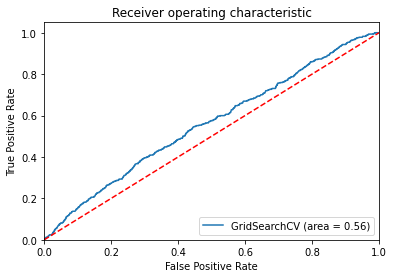

In [35]:
probs = best_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [36]:
classes = best_clf.predict(X_test)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print (accuracy, balanced_accuracy, precision, average_precision, f1_score, recall, roc_auc)

0.9665715748665057 0.9665715748665057 0.0 nan 0.0 0.0 0.5598374047285569


C:\Users\manoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\manoj\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\manoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
print(metrics.classification_report(classes, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     13671
           1       0.00      0.00      0.00         0

    accuracy                           0.97     13671
   macro avg       0.50      0.48      0.49     13671
weighted avg       1.00      0.97      0.98     13671



C:\Users\manoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc

df_train=pd.DataFrame(columns=['threshold','prediction','probability','conversion'])
for threshold in np.arange(0, 0.05, 0.01):
    print(threshold)

0.0
0.01
0.02
0.03
0.04


In [39]:
in_sample_preds = logit_fit.predict(X_train)
out_sample_preds = logit_fit.predict(X_test)

df_train_array = pd.DataFrame(columns=['threshold','insample accuracy','insample precision', 'insample recall', 'insample auc', 'outsample accuracy','outsample precision', 'outsample recall', 'outsample auc'])
for threshold in np.arange(0.01, 0.45, 0.01):
    a=accuracy_score(y_train, in_sample_preds > threshold)
    b=precision_score(y_train, in_sample_preds > threshold)
    c=recall_score(y_train, in_sample_preds > threshold)
    d=0 # auc(y_train, in_sample_preds > threshold)
    e=accuracy_score(y_test, out_sample_preds > threshold)
    f=precision_score(y_test, out_sample_preds > threshold)
    g=recall_score(y_test, out_sample_preds > threshold)
    h= 0 # auc(y_test, out_sample_preds > threshold)
    df_train_array = pd.concat([pd.DataFrame([[threshold,a,b,c,d,e,f,g,h]], columns=df_train_array.columns), df_train_array])

C:\Users\manoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

In [40]:
    
print(df_train_array)

#for loop for threshold = 0.01 to 0.99 in increments of 0.01
#for threshold in np.arange(0, 1, 0.01):



   threshold  insample accuracy  insample precision  insample recall  \
0       0.44           0.964961            0.000000         0.000000   
0       0.43           0.964961            0.000000         0.000000   
0       0.42           0.964961            0.000000         0.000000   
0       0.41           0.964961            0.000000         0.000000   
0       0.40           0.964961            0.000000         0.000000   
0       0.39           0.964961            0.000000         0.000000   
0       0.38           0.964961            0.000000         0.000000   
0       0.37           0.964924            0.000000         0.000000   
0       0.36           0.964888            0.000000         0.000000   
0       0.35           0.964833            0.181818         0.001044   
0       0.34           0.964833            0.333333         0.003653   
0       0.33           0.964742            0.312500         0.005219   
0       0.32           0.964778            0.391304         0.00

In [41]:
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))
print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))
print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [42]:
print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

In [ ]:
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

In [ ]:
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)
print(in_sample_thresholds)

In [ ]:
logit_df=pd.read_html(logit_fit.summary().tables[1].as_html(),header=0, index_col=0)
logit_df[0].head(5)
logit_df=logit_df[0]

logit_df.head()

In [ ]:
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Model ROC Curve')
plt.legend(loc="lower right")

plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b.**  Using the Model Summary answer the following questions <br>Remember:  `Campaign_2` & `Campaign_3` are encoded in relation to `Campaign_1`, when interpretting them remember to mention that their effect is relative to `Campaign_1`).
<br>You can provide your answer as a comment (`# Anything following a hash mark is a comment`) or in any other manner you like.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i.** **(`3 pts`)**which variables have a statistically significant positive correlation with the target
<br>

In [ ]:
#print the coefficients of the model which are statistically significant and have a positive correlation with the target

logit_df[(logit_df['P>|z|']<0.05) & (logit_df['coef']>0)]


#As we can see, the "Total_Past_Communications"  and "Total_Links" variables have a positive correlation with the target variable 
# and are also statistically significant(p<0.05). 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii.** **(`3 pts`)**
which variables have a statistically significant negative correlation with the target?

In [ ]:
#print the coefficients of the model which are statistically significant and have a negative correlation with the target

logit_df[(logit_df['P>|z|']<0.05) & (logit_df['coef']<0)]


#As we can see, the "Subject_Hotness_Score"  and "Word_Count" variables have a negative correlation with the target variable 
# and are also statistically significant (p<0.05). 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii.** **(`4 pts`)**
What suggestions can you make based on these results? 

In [ ]:
#based on these variable coefficients, suggestions would be:
#1. Increase the "Total_Past_Communications" and "Total_Links" - meaning send more emails to get more conversions
#2. Decrease the "Subject_Hotness_Score" and "Word_Count" - Communication should have fewer words and less subject hotness

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**c.** **(`5 pts`)** Use your model to get predictions using the test data.  Remember that your fit model is the result of the `.fit()` call (e.g., `my_fit = my_model.fit()`).  The resulting object has a `.predict` method (e.g., `my_fit.predict()`) that will generate predictions using your model on the specified data.  <br>Get predictions by applying the model you just fit to the _test_ data.  Save the predictions to a variable.<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**d.**  **(`5 pts`)** The ROC AUC score informs you as to how good your model is at telling which emails are more likely to result in conversions than others. You can use the Scikit-Learn function `sklearn.metrics.roc_auc_score` to compute this. This function has two inputs: predictions and the actual value from the data.  You already have both of these variables. *You may want to take a look at Chapter 8's Notebook for more details on this metric*